In [105]:
import pandas as pd 
import os 
import numpy as np 
import torch
import matplotlib.pyplot as plt

In [76]:
from vae import VAE, train, prob_new

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Read in the sorted counts file
directory = 'random100/'
extension = '.vcf_sorted.txt'

files = [file for file in os.listdir(directory) if file.endswith(extension)]
concat_counts = None 

for file in files:
    file_path = os.path.join(directory, file)
    filename = file.strip(extension)
    counts = pd.read_csv(file_path, sep='  ', header=None, index_col=0)
    counts.columns = [filename]
    if concat_counts is None:
        concat_counts = counts
    else:
        concat_counts = pd.merge(concat_counts, counts, left_index=True, right_index=True, how='inner')

/var/folders/7c/5fz73cgj411g5b_8cfzpfqrr0000gp/T/ipykernel_27714/86573698.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.read_csv(file_path, sep='  ', header=None, index_col=0)
/var/folders/7c/5fz73cgj411g5b_8cfzpfqrr0000gp/T/ipykernel_27714/86573698.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.read_csv(file_path, sep='  ', header=None, index_col=0)
/var/folders/7c/5fz73cgj411g5b_8cfzpfqrr0000gp/T/ipykernel_27714/86573698.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and differ

In [23]:
concat_counts.shape

(41773, 100)

In [26]:
genotype_counts = concat_counts.replace({'0/0': 0, '0/1': 0.5, '1/1': 1})
genotype_counts.head()


,1970.23andme.1158,8105.23andme.6446,4741.23andme.3332,3822.ftdna-illumina.2540,3571.ancestry.2341,5830.23andme.4308,2509.23andme.1538,8760.ancestry.7094,8003.ancestry.6342,1592.23andme.892,...,5047.23andme.3576,3779.23andme.2503,1463.23andme.802,5944.23andme.4447,1580.23andme.885,6340.ftdna-illumina.4895,9018.ancestry.7358,2702.23andme.1712,3000.23andme.1922,9517.23andme.7811
0,,,,,,,,,,,,,,,,,,,,,
rs1000007,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.5,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5
rs10000226,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
rs1000031,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,0.0,...,0.5,1.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0
rs10000438,0.5,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.5,0.5
rs10000976,0.5,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.0,...,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.5


In [146]:
genotype_counts = genotype_counts.T
genotype_counts.shape

(100, 41773)

In [148]:
vae = VAE(input_dim=genotype_counts.shape[1], hidden_dims=[500, 100], latent_dim=5)
vae = vae.to("mps")
vae_trained, losses = train(vae, torch.as_tensor(genotype_counts.values.astype(np.float32), device="mps"), epochs=1000)

input_dim:  41773


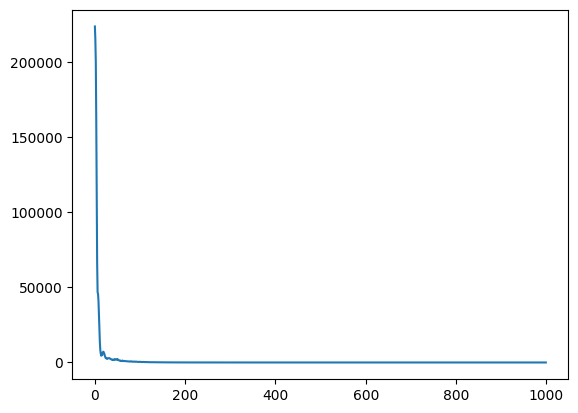

In [149]:
plt.plot(losses)

In [199]:
torch.randn(1, genotype_counts.shape[1], device="mps")/1000000

tensor([[-8.3796e-07,  1.8539e-06,  6.6246e-07,  ..., -6.9934e-07,
         -2.0873e-07, -7.8409e-07]], device='mps:0')

In [204]:
prob = prob_new(vae_trained, torch.ones(1, genotype_counts.shape[1], device="mps"))

In [187]:
prob = prob_new(vae_trained, torch.as_tensor(genotype_counts.values.astype(np.float32)[20,:], device="mps"))

In [188]:
prob

tensor(0.8881, device='mps:0', grad_fn=<ExpBackward0>)